To simulate a polynomial curve with Normal noise, we can use the following code:

In [3]:
import numpy as np

def simulate_polynomial_curve(x, degree, noise_std):
    coefficients = np.random.normal(size=degree+1)
    y = np.zeros_like(x)
    for i in range(degree+1):
        y += coefficients[i] * np.power(x, i)
    y += np.random.normal(scale=noise_std, size=len(x))
    return y


Next, we can generate some data using this function:

In [5]:
x = np.linspace(-5, 5, 100)
y_true = np.sin(x)
y = simulate_polynomial_curve(x, degree=5, noise_std=0.1)


Now we can use the Gaussian process to learn the shape of the underlying curve. We will use a zero-mean Gaussian process with a squared exponential covariance kernel. The code to train the GP and generate the posterior mean and samples is shown below:

In [7]:
import GPy

# define the kernel
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

# create the GP model
model = GPy.models.GPRegression(x[:,None], y[:,None], kernel)

# optimize the model hyperparameters
model.optimize()

# make predictions at test points
x_test = np.linspace(-6, 6, 200)
y_mean, y_var = model.predict(x_test[:,None])

# generate samples from the posterior
n_samples = 20
y_samples = model.posterior_samples_f(x_test[:,None], size=n_samples)


Finally, we can plot the results using matplotlib:

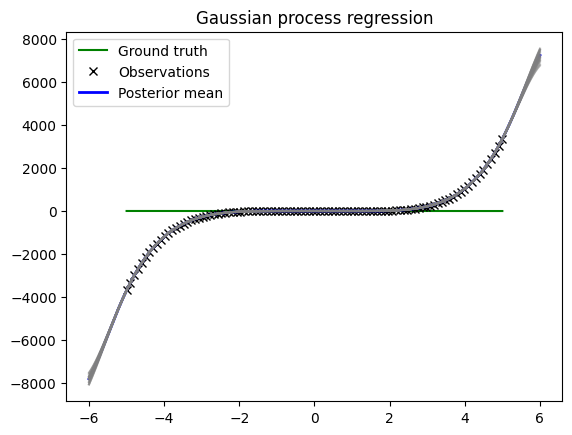

In [9]:
import matplotlib.pyplot as plt

# plot the ground truth curve
plt.plot(x, y_true, color='green', label='Ground truth')

# plot the noisy observations
plt.plot(x, y, 'x', color='black', label='Observations')

# plot the posterior mean curve estimate
plt.plot(x_test, y_mean, linewidth=2, color='blue', label='Posterior mean')

# plot the posterior samples
for i in range(y_samples.shape[2]):
    plt.plot(x_test, y_samples[:, 0, i], color='gray', alpha=0.5)

# add legend and title
plt.legend()
plt.title('Gaussian process regression')

plt.show()

#This will produce a plot showing the ground truth curve in green, the noisy observations as black crosses, 
#the posterior mean curve estimate as a blue line, and 20 posterior samples as gray lines:

